# Laboratorio 2

## Inteligencia de Negocios

## Integrantes:
    Juan Diego Cardona 201819447
    Nicolas Ortega 201814515
    Camila Teran 201822000

## Carga de librerías necesarias para implementación

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## Carga de datos

In [165]:
# Se cargan los datos. 
datos=pd.read_csv('datos.csv', sep=';', encoding = 'utf-8')

## Perfilamiento y entendimiento de los datos 

In [166]:
datos.shape

(660, 11)

In [167]:
datos.head()

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3


In [168]:
# Revisar las características de los datos: completitud y tipo de dato
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   660 non-null    int64  
 1   Customer             658 non-null    float64
 2   Limit_bal            659 non-null    float64
 3   Sex                  659 non-null    object 
 4   Education            659 non-null    object 
 5   Marriage             658 non-null    object 
 6   Age                  659 non-null    float64
 7   Total_Credit_Cards   658 non-null    float64
 8   Total_visits_bank    658 non-null    object 
 9   Total_visits_online  659 non-null    float64
 10  Total_calls_made     659 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 56.8+ KB


In [169]:
# Resumen de los estadisticos de las variables numéricas
datos.describe()

,Id,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_online
count,660.000000,658.000000,659.000000,659.000000,6.580000e+02,659.000000
mean,330.500000,55180.056231,170000.000000,95.218513,1.876290e+05,2.602428
std,190.669872,25651.348197,129739.041329,1432.660847,4.812847e+06,2.936469
min,1.000000,11265.000000,10000.000000,21.000000,1.000000e+00,0.000000
25%,165.750000,33875.500000,50000.000000,28.000000,3.000000e+00,1.000000
50%,330.500000,53907.000000,140000.000000,33.000000,5.000000e+00,2.000000
75%,495.250000,77321.500000,240000.000000,41.000000,6.000000e+00,4.000000
max,660.000000,99843.000000,630000.000000,36745.000000,1.234568e+08,15.000000


In [170]:
datos.dtypes

Id                       int64
Customer               float64
Limit_bal              float64
Sex                     object
Education               object
Marriage                object
Age                    float64
Total_Credit_Cards     float64
Total_visits_bank       object
Total_visits_online    float64
Total_calls_made        object
dtype: object

# Limpieza de Datos

In [171]:
datoslimpios = datos
datoslimpios

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108.0,280000.0,Male,2,Married,39.0,10.0,1,10.0,0
656,657,60732.0,290000.0,Female,3,Single,27.0,10.0,1,13.0,2
657,658,53834.0,190000.0,Female,1,Single,28.0,8.0,1,9.0,1
658,659,80655.0,80000.0,Female,1,Single,23.0,10.0,1,15.0,0


In [172]:
for x in datoslimpios.columns:
    datoslimpios.drop(datoslimpios.loc[datoslimpios[x]=='?'].index,inplace=True)

In [173]:
datoslimpios["Sex"]=datoslimpios.Sex.replace({'F':'Female','f':'Female','Femael':'Female','Fmale':'Female'})
datoslimpios["Sex"]=datoslimpios.Sex.replace({'M':'Male','Mael':'Male','M ':'Male'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Sex"]=='9'].index,inplace=True)

In [174]:
datoslimpios["Education"]=datoslimpios.Education.replace({'6':'5'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Education"]=='ABC'].index,inplace=True)

In [175]:
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='1'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='2'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='0'].index,inplace=True)

In [176]:
datoslimpios = datoslimpios.dropna()

In [177]:
datoslimpios

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3
5,6,58634.0,50000.0,Male,1,Single,37.0,3.0,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108.0,280000.0,Male,2,Married,39.0,10.0,1,10.0,0
656,657,60732.0,290000.0,Female,3,Single,27.0,10.0,1,13.0,2
657,658,53834.0,190000.0,Female,1,Single,28.0,8.0,1,9.0,1
658,659,80655.0,80000.0,Female,1,Single,23.0,10.0,1,15.0,0


In [178]:
#Restricciones

datoslimpios = datoslimpios.drop(['Id'], axis=1)
datoslimpios = datoslimpios.drop(['Customer'], axis=1)

datoslimpios = datoslimpios[datoslimpios.Age < 100]
datoslimpios = datoslimpios[datoslimpios.Age >= 21]

datoslimpios = datoslimpios[datoslimpios.Total_Credit_Cards <= 10]


In [179]:
datoslimpios["Total_visits_bank"] = datoslimpios.Total_visits_bank.astype(float)
datoslimpios["Total_calls_made"] = datoslimpios.Total_calls_made.astype(float)
datoslimpios["Education"] = datoslimpios.Education.astype(float)

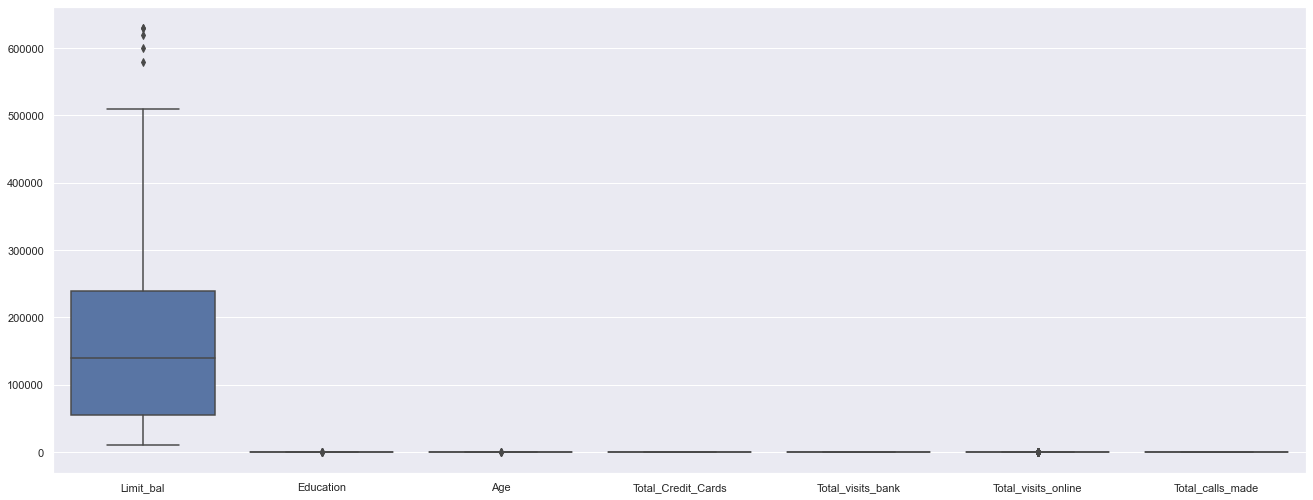

In [180]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datoslimpios, orient="v")

In [181]:
# Explorar las variables que no son numéricas
name_cols_non_number = datoslimpios.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Sex', 'Marriage'], dtype='object')

In [182]:
#Revisar el contenido de las variables que no son numéricas
datoslimpios[name_cols_non_number].describe()

,Sex,Marriage
count,639,639
unique,2,3
top,Female,Single
freq,369,373


In [183]:
#Consulto una muestra de datos para analizarlos mejor
datoslimpios[name_cols_non_number].sample(15)

,Sex,Marriage
645,Male,Single
499,Male,Married
652,Female,Single
398,Female,Married
424,Female,Married
14,Male,Single
592,Male,Married
12,Female,Single
583,Female,Single
141,Male,Single


In [184]:
datoslimpios

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,20000.0,Female,2.0,Married,24.0,2.0,1.0,1.0,0.0
1,120000.0,Female,2.0,Single,26.0,3.0,0.0,10.0,9.0
2,90000.0,Female,2.0,Single,34.0,7.0,1.0,3.0,4.0
4,50000.0,Male,2.0,Married,57.0,6.0,0.0,12.0,3.0
5,50000.0,Male,1.0,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...
655,280000.0,Male,2.0,Married,39.0,10.0,1.0,10.0,0.0
656,290000.0,Female,3.0,Single,27.0,10.0,1.0,13.0,2.0
657,190000.0,Female,1.0,Single,28.0,8.0,1.0,9.0,1.0
658,80000.0,Female,1.0,Single,23.0,10.0,1.0,15.0,0.0


## K - Means

### Prepararación de datos

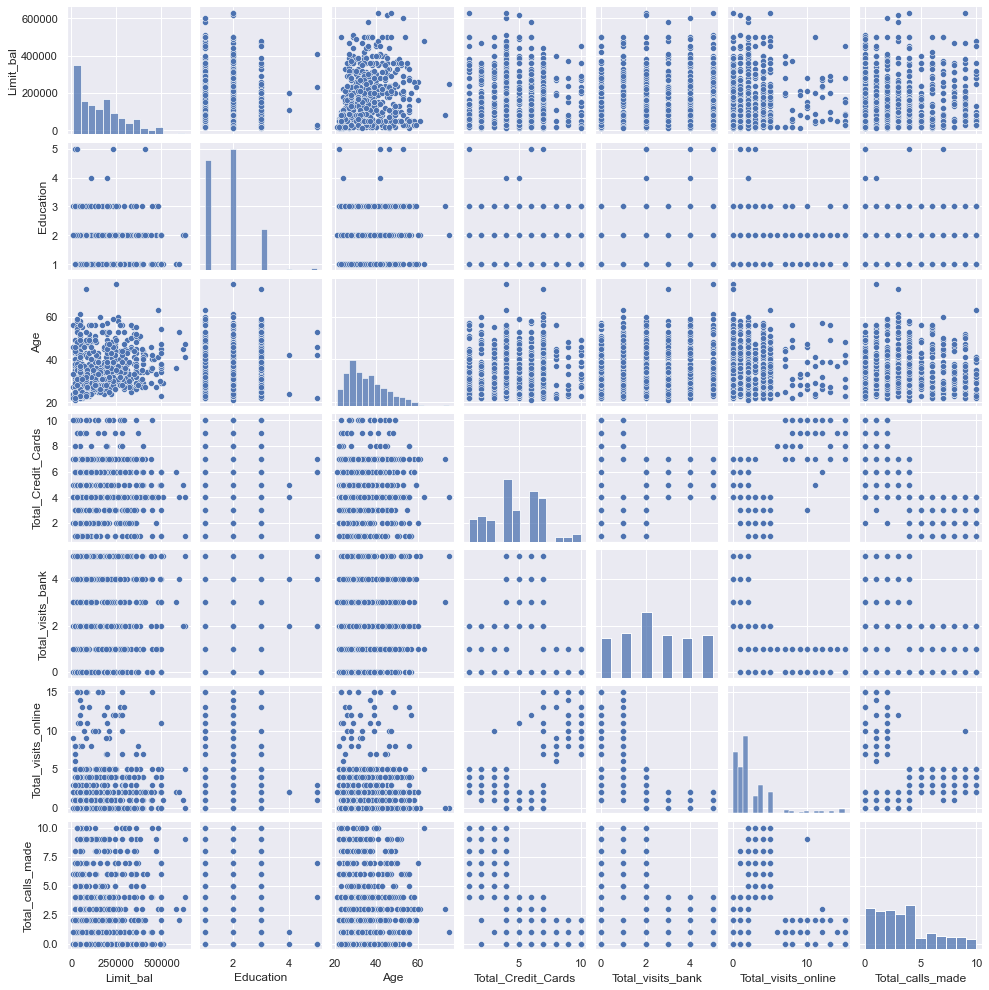

In [186]:
# Ver si hay grupos naturales en los datos
sns.pairplot(datoslimpios.dropna(), height=2,vars=['Limit_bal','Education','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made'],kind='scatter')

### Encontrar el número óptimo de clústeres utilizando el método del codo

In [1]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [2]:
plot_distortion(X,1,11)

NameError: name 'X' is not defined

### Evaluación de la calidad de los clústeres obtenidos

In [189]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


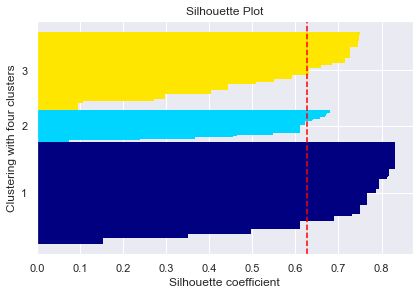

In [190]:
# Esta función puede tardar varios minutos
plot_silhouette(data = X, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with three clusters')

### Determinación de el "mejor" número de clúster 

In [191]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

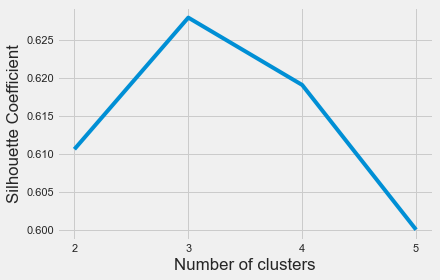

In [192]:

plot_selectK_silhoute(X,
                    k_min=2, 
                    k_max=6)

### Evaluación de la calidad de los clústeres obtenidos

[0 1 2]


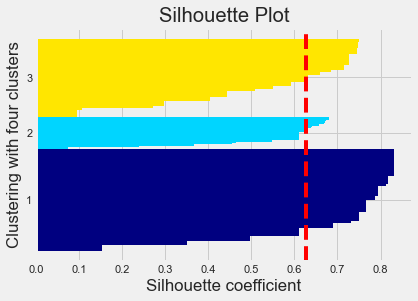

In [193]:
plot_silhouette(data = X, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with three clusters')

### Construcción el modelo

In [194]:
# Construimos un nuevo modelo, con las nuevas columnas y probaremos con k=2 y k=3
N_clusters=3
kmeans = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans = kmeans.fit(X)

### Visualización de resultados

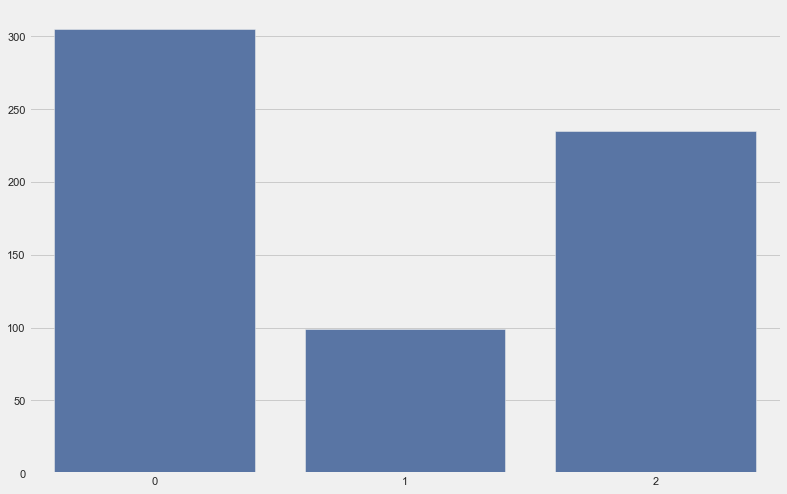

In [196]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datoslimpios['Cluster'] = labels

cluster_distrib = datoslimpios['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [197]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datoslimpios.groupby('Cluster').count()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,,,,,
0,305,305,305,305,305,305,305,305,305
1,99,99,99,99,99,99,99,99,99
2,235,235,235,235,235,235,235,235,235


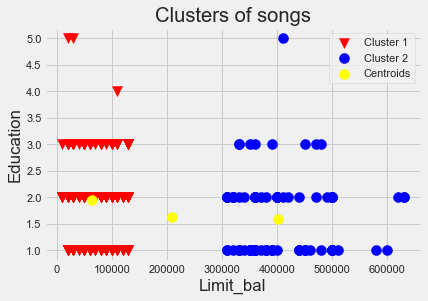

In [198]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


In [199]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans.cluster_centers_)

Centroides: [[ Limit_bal   Education ]] [[6.34098361e+04 1.94754098e+00 3.35049180e+01 4.70163934e+00
  2.35737705e+00 2.56721311e+00 3.52786885e+00 1.77635684e-15]
 [4.02525253e+05 1.59595960e+00 3.80101010e+01 4.45454545e+00
  2.66666667e+00 2.38383838e+00 3.77777778e+00 1.00000000e+00]
 [2.08936170e+05 1.62127660e+00 3.58638298e+01 5.00851064e+00
  2.48936170e+00 2.70212766e+00 3.27234043e+00 2.00000000e+00]]


### Visualización de el resultado

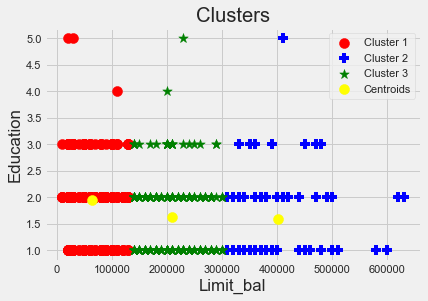

In [202]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 0 y 1
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 0], cols_number[kmeans.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


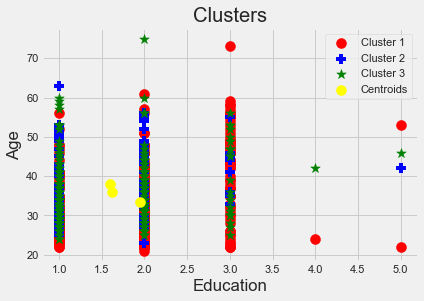

In [203]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(cols_number[kmeans.labels_ == 0, 1], cols_number[kmeans.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 1], cols_number[kmeans.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 1], cols_number[kmeans.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(name_cols_number[1])
plt.ylabel(name_cols_number[2])
plt.legend()
plt.show()


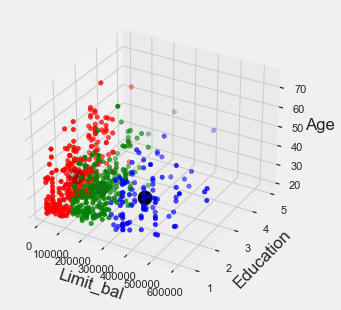

In [204]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], cols_number[kmeans.labels_ == 0, 2],color='red')
ax.scatter(cols_number[kmeans.labels_ == 2, 0], cols_number[kmeans.labels_ == 2, 1], cols_number[kmeans.labels_ == 2, 2],color='green')
ax.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], cols_number[kmeans.labels_ == 1, 2],color='blue')

ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(name_cols_number[0])
ax.set_ylabel(name_cols_number[1])
ax.set_zlabel(name_cols_number[2])
plt.show()